## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp

## Load Dataset

In [10]:
data = pd.read_csv('data/revenue-data.csv')

In [11]:
data.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,32,314.06,30.14,0,Degree,Private sector,Male,London,60173.49
1,20,3758.36,149.36,4,GCSE,Private sector,Female,South East,42965.45
2,36,601.72,21.87,0,Masters,Private sector,Male,East of England,54924.41
3,21,44.89,182.80,9,Masters,Private sector,Female,Northern Ireland,26734.99
4,24,614.80,194.34,0,GCSE,Private sector,Male,Scotland,15325.23


## Data Processing

In [12]:
data['£35K+ Salary'] = np.where(data['Salary'] > 35000, True, False )

In [13]:
data.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary,£35K+ Salary
0,32,314.06,30.14,0,Degree,Private sector,Male,London,60173.49,True
1,20,3758.36,149.36,4,GCSE,Private sector,Female,South East,42965.45,True
2,36,601.72,21.87,0,Masters,Private sector,Male,East of England,54924.41,True
3,21,44.89,182.80,9,Masters,Private sector,Female,Northern Ireland,26734.99,False
4,24,614.80,194.34,0,GCSE,Private sector,Male,Scotland,15325.23,False


### Label Encoding

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data["Education"] = le.fit_transform(data['Education'])
data["WorkType"] = le.fit_transform(data["WorkType"])
data['Sex'] = le.fit_transform(data['Sex'])
data['Region'] =  le.fit_transform(data['Region'])
data['£35K+ Salary'] =  le.fit_transform(data['£35K+ Salary'])

In [15]:
data.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary,£35K+ Salary
0,32,314.06,30.14,0,1,0,1,2,60173.49,1
1,20,3758.36,149.36,4,2,0,0,7,42965.45,1
2,36,601.72,21.87,0,3,0,1,1,54924.41,1
3,21,44.89,182.80,9,3,0,0,5,26734.99,0
4,24,614.80,194.34,0,2,0,1,6,15325.23,0


In [16]:
#feature variables
x = data.drop(['£35K+ Salary'], axis=1)
x = x.drop(['Salary'], axis=1)
x

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region
0,32,314.06,30.14,0,1,0,1,2
1,20,3758.36,149.36,4,2,0,0,7
2,36,601.72,21.87,0,3,0,1,1
3,21,44.89,182.80,9,3,0,0,5
4,24,614.80,194.34,0,2,0,1,6
...,...,...,...,...,...,...,...,...
995,56,177.67,272.87,5,2,1,0,4
996,54,155.42,231.17,5,5,0,1,9
997,22,2376.10,287.15,11,5,0,1,7
998,49,4355.04,27.78,0,1,0,1,5


In [17]:
#target variable
y = data['£35K+ Salary']
y

0      1
1      1
2      1
3      0
4      0
      ..
995    0
996    0
997    1
998    1
999    1
Name: £35K+ Salary, Length: 1000, dtype: int64

## Decision Tree Classifier

In [149]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [150]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [151]:
#Evaluation using Accuracy score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 91.0


In [152]:
#Evaluation using Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 54,  10],
       [  8, 128]], dtype=int64)

In [153]:
#Evaluation using Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        64
           1       0.93      0.94      0.93       136

    accuracy                           0.91       200
   macro avg       0.90      0.89      0.90       200
weighted avg       0.91      0.91      0.91       200



In [154]:
#checking prediction value
model.predict([[50,40,190,9,6,1,2,4]])

array([1], dtype=int64)

In [155]:
#checking prediction value
model.predict([[20,630,174.34,0,2,0,1,5]])

array([0], dtype=int64)

### Hyperparameter Tuning

In [156]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [157]:
std_slc = StandardScaler()

In [158]:
pca = decomposition.PCA()

In [159]:
dec_tree = tree.DecisionTreeClassifier()

In [160]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

In [161]:
n_components = list(range(1,X.shape[1]+1,1))

In [162]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [163]:
parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

In [ ]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(x, y)

In [165]:
 print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 12
Best Number Of Components: 7

DecisionTreeClassifier(max_depth=12)


In [200]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best')

DecisionTreeClassifier(max_depth=12)

In [209]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion='gini', max_depth=12)

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [210]:
#Evaluation using Accuracy score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 91.5


## Logistic Regression

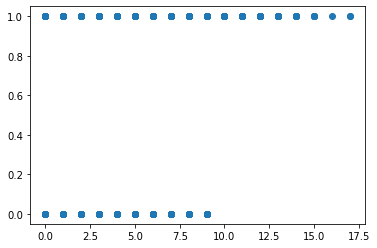

In [25]:
plt.scatter(data['RecommendImpression'], data['£35K+ Salary'])
plt.show()# Divide the Data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data['RecommendImpression'], data['£35K+ Salary'], test_size=0.20)

In [26]:
# Building the Logistic Regression model

# Normalising the data
def normalize(X):
    return X - X.mean()

# Make predictions
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

# The model
def logistic_regression(X, Y):

    X = normalize(X)

    # Initializing variables
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred)) # Loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred)) # Loss wrt b1
        # Update b0 and b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1

        return b0, b1

In [27]:
from mpmath import *

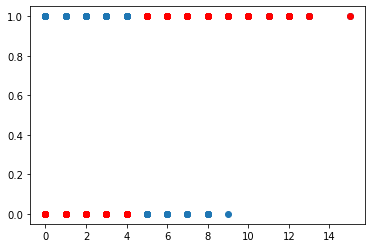

Accuracy = 0.56


In [28]:
# Training the Model
b0, b1 = logistic_regression(X_train, y_train)# Making predictions and setting a threshold
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]
# Plotting the data
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
plt.show()# Calculating the accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

### Hyperparameter Tuning

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

In [84]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.639667 using {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.633667 (0.042933) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.635333 (0.041532) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.634333 (0.044173) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.633667 (0.042933) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.630333 (0.041592) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.634667 (0.043415) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.633333 (0.042921) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.639667 (0.037548) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.633000 (0.043524) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.630667 (0.043123) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.634000 (0.041199) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.631667 (0.043134) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.628333 (0.041399) with: {

C:\Institutions\Gre\Apps\Anaconda3-2021.05\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random Forrest Classifier

In [32]:
from sklearn.datasets import make_classification

In [34]:
x.shape, y.shape

((1000, 8), (1000,))

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [36]:
X_train.shape, Y_train.shape

((800, 8), (800,))

In [37]:
X_test.shape, Y_test.shape

((200, 8), (200,))

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [39]:
rf = RandomForestClassifier(max_features=5, n_estimators=100)

In [40]:
rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=5)

In [41]:
Y_pred = rf.predict(X_test)

In [42]:
Y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1], dtype=int64)

In [43]:
accuracy_score(Y_pred, Y_test)

0.955

### Hyperparameter Tuning

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
max_features_range = np.arange(1,5,1)

In [97]:
n_estimators_range = np.arange(10,210,10)

In [98]:
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

In [99]:
rf = RandomForestClassifier()

In [100]:
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [101]:
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [102]:
print("Optimal parameters %s accuracy score of  %0.3f"
      % (grid.best_params_, grid.best_score_))

Optimal parameters {'max_features': 3, 'n_estimators': 70} accuracy score of  0.944
